Multiple Linear Regression

In [2]:
print("test")

test


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
!curl -o FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0   349k      0 --:--:-- --:--:-- --:--:--  349k


Reading the data

In [5]:
df=pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,8.5,196
1,2.4,4,11.2,9.6,221
2,1.5,4,6.0,5.9,136
3,3.5,6,12.7,11.1,255
4,3.5,6,12.1,10.6,244
5,3.5,6,11.9,10.0,230
6,3.5,6,11.8,10.1,232
7,3.7,6,12.8,11.1,255
8,3.7,6,13.4,11.6,267


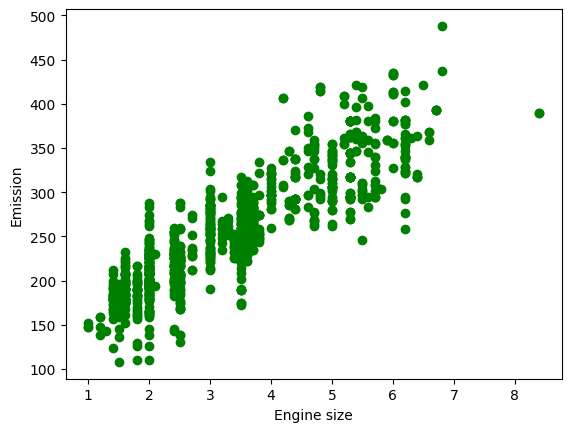

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf. CO2EMISSIONS, color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Creating train and test dataset

In [8]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

Train data distribution

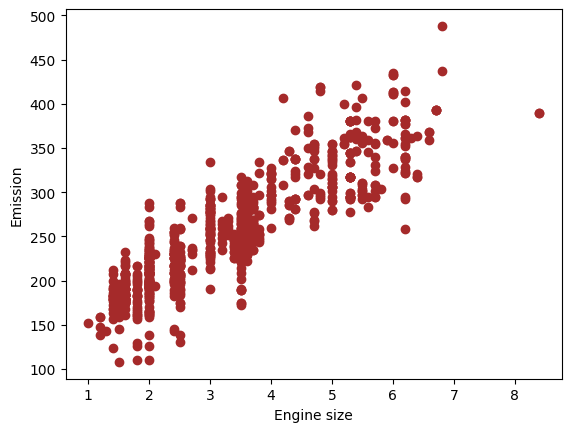

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='brown')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Multiple Regression Model

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [13]:
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x,y)
print('Coefficients:', regr.coef_)

Coefficients: [[12.20057886  6.85821296  9.3308221 ]]


OLS

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

Prediction

In [18]:
y_hat=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("mean squared error (MSE): %.2f"
        % np.mean((y_hat -y)** 2))

print('Variance score: %.2f' % regr.score(x,y))

mean squared error (MSE): 636.88
Variance score: 0.84


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Practice

Try to use a multiple linear regression with the same dataset, but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?


In [20]:
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x,y)
print('Coefficients:', regr.coef_)
y_cap=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("mean squared error (MSE): %.2f"
        % np.mean((y_hat -y)** 2))
print('Variance score: %.2f' % regr.score(x,y))

Coefficients: [[12.58139403  5.6956203   8.229281  ]]
mean squared error (MSE): 636.88
Variance score: 0.83


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


where is 'FUELCONSUMPTION_HWY'?